# Titanic disaster

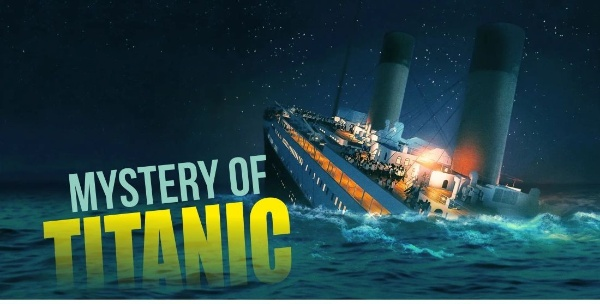

# The Titanic: A Story Beyond the Data

On a chilly night in April 1912, the Titanic, a majestic ship hailed as the "unsinkable," embarked on its maiden voyage. It carried a diverse group of passengers, each with unique stories and dreams.

## The Social Hierarchy  
The ship's grandeur was mirrored in its design, with three classes marking the divide between luxury and necessity.

- **First Class**: Reserved for the wealthy elite, it boasted grand salons, private suites, and fine dining. Passengers who boarded at **C (Cherbourg)** often represented the wealthiest class, with privileges like access to lifeboats during the chaos.  
- **Second Class**: Filled with middle-class travelers, including professionals and small business owners. Many boarded at **Q (Queenstown)**, seeking a brighter future in America while enjoying the comforts of the Titanic.  
- **Third Class**: The lower decks buzzed with families and individuals seeking new beginnings. Most of these passengers boarded at **S (Southampton)**, embarking on a journey of hope despite the limited accommodations.  

## A Diverse Voyage  
The passengers came from various **regions of the world**, reflecting a vibrant cultural mosaic. Some were seasoned travelers, while others left everything behind, driven by dreams of a new life.  

## The Call of Duty  
As the ship sailed, the dedicated **crew** ensured everything was in order. Engineers worked tirelessly in the bowels of the ship, while stewards attended to passengers' needs. The crew’s resilience shone during the disaster, guiding passengers to lifeboats and ensuring as many as possible reached safety.  

## Gender Roles  
Society's expectations were evident. Women and children were given priority in the lifeboats. Men were often left behind, either by choice to save others or due to limited opportunities to escape.  

## Economic Divide  
The wealth disparity was glaring. The **fare prices** varied drastically, with first-class tickets costing a fortune compared to third-class tickets. This economic divide often determined access to lifeboats and safety, with those from **C (Cherbourg)** and **Q (Queenstown)** finding it easier to reach the lifeboats compared to many from **S (Southampton)**.  

## Family Bonds  
Families clung to one another amidst the panic. Parents in third class held their children tightly, fearing separation. Meanwhile, some traveling alone bore the weight of isolation during the chaos.  

## Age and Resilience  
The Titanic was a mosaic of ages. Children clung to their parents, while elderly passengers faced the tragedy with quiet resolve. The young, often more agile and quick to react, sometimes found ways to survive in the chaos.  

## The Fateful Night  
The ship’s grandeur and dreams came to an abrupt halt when it struck the iceberg. The icy waters spared no one, regardless of class, age, or gender. The lifeboats became a symbol of hope and despair. Passengers from **C (Cherbourg)** often reached safety, while those from **S (Southampton)** faced locked gates and treacherous routes to the deck.  

## Survival  
When the Carpathia arrived to rescue the survivors, the faces aboard told tales of loss and survival. Those who made it held a mixture of guilt and gratitude, knowing the odds had been unevenly stacked.  

---


### Data description


- Survived: 0 = Did not survive, 1 = Survived

- Pclass: Ticket class where 1 = First class, 2 = Second class, 3 = Third class. This can also be seen as a proxy for socio-economic status.

- Sex: Male or female

- Age: Age in years, fractional if less than 1

- SibSp: Number of siblings or spouses aboard the titanic

- Parch: Number of parents or children aboard the titanic

- Ticket: Passenger ticket number

- Fare: Passenger fare

- Cabin: Cabin number

- Embarked: Point of embarkation where C = Cherbourg, Q = Queenstown, S = Southampton

* Survival probability is highest for location C and lowest for location S.

Is there a reason for this occurence? We can formulate a hypothesis whereby the majority of the first class passengers have embarked from location C and because they have a highest survival probability, this has resulted in location C having a highest survival probability. Alternatively, there could have been more third class passengers that embarked from location S and because they have the lowest survival probability, this has caused location S to have the lowest survival probability.

In [25]:
import pandas as pd
#from sklearn import preprocessing as prep
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [26]:
train = pd.read_csv('titanic_train.csv')

In [27]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

In [28]:
train.shape

(891, 12)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [31]:
Data_dict = pd.DataFrame(train.dtypes)
Data_dict

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [32]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [33]:
# identifying the missing values from the train dataset.

Data_dict['MissingVal'] = train.isnull().sum()
Data_dict

,0,MissingVal
PassengerId,int64,0
Survived,int64,0
Pclass,int64,0
Name,object,0
Sex,object,0
Age,float64,177
SibSp,int64,0
Parch,int64,0
Ticket,object,0
Fare,float64,0


### Univariate Data Analysis EDA

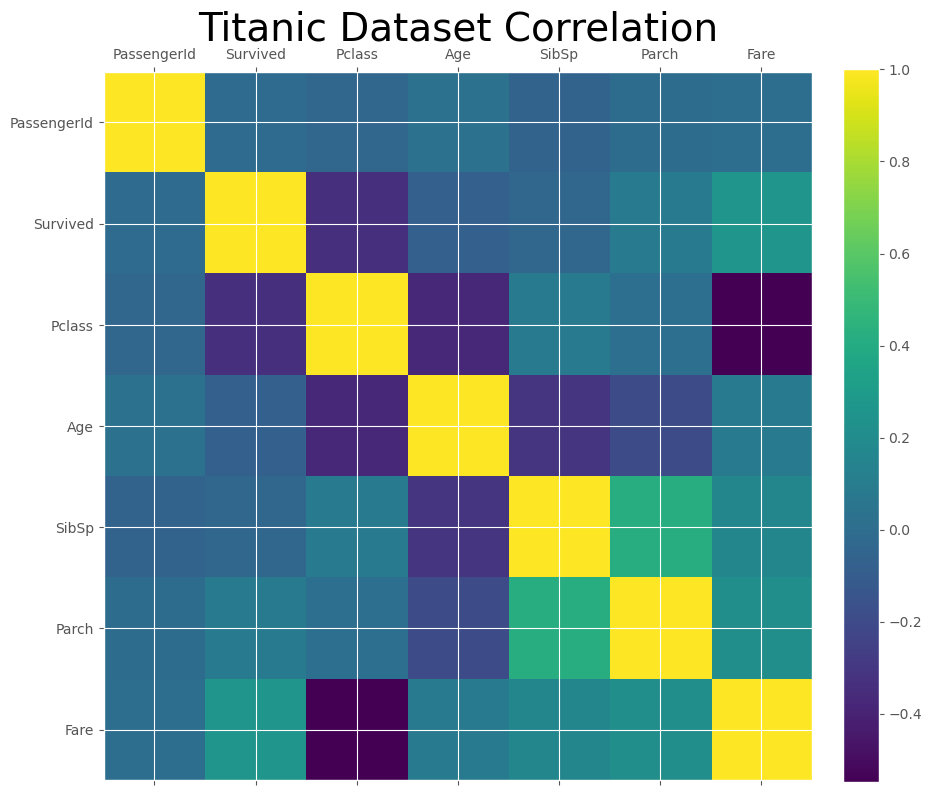

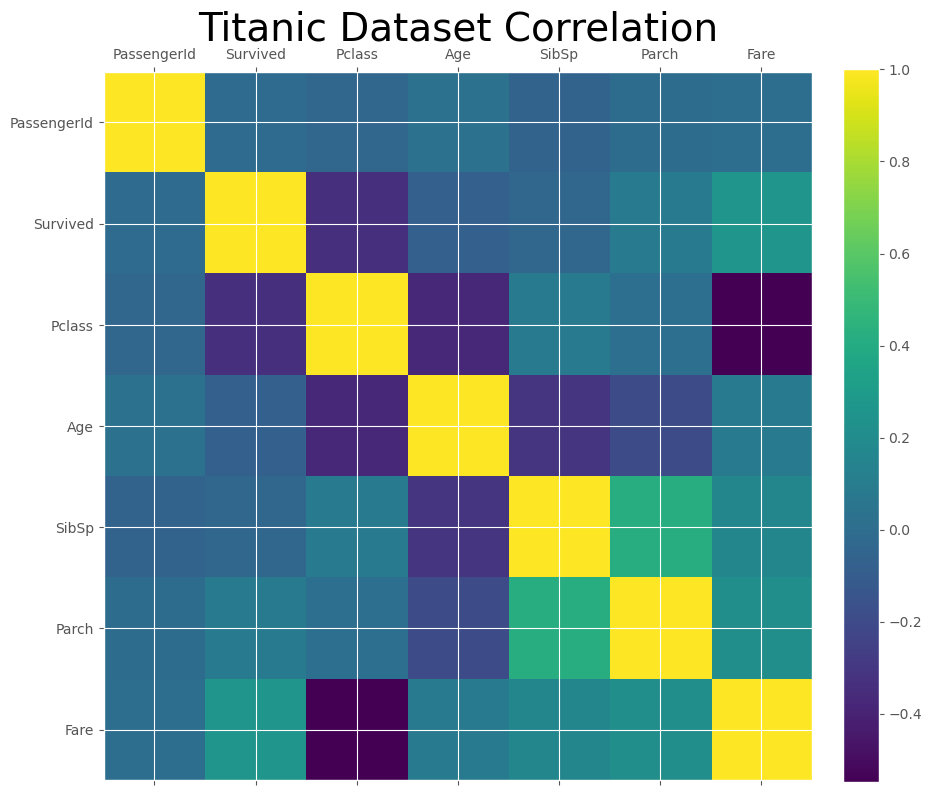

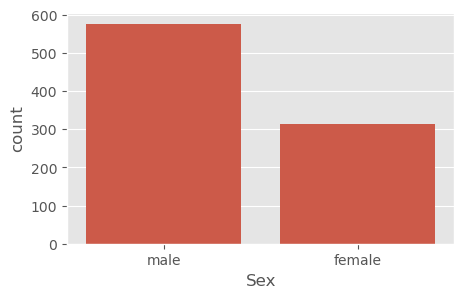

In [34]:
plt.figure(figsize=(5, 3))
sns.countplot(x='Sex' , data = train)
plt.show()

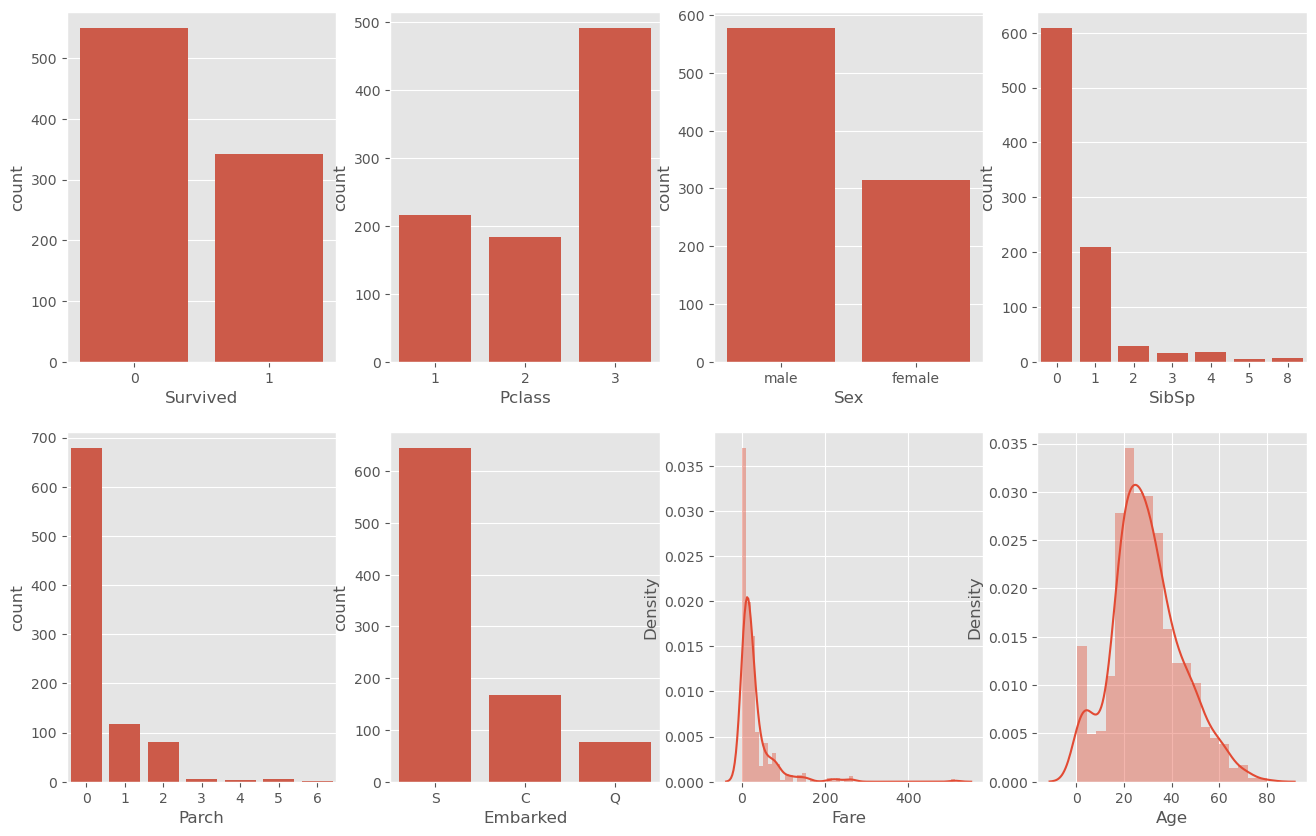

In [35]:
fig , axes = plt.subplots(2, 4, figsize = (16,10) )
sns.countplot(x='Survived' , data = train, ax = axes[0,0])
sns.countplot(x='Pclass' , data = train, ax = axes[0,1])
sns.countplot(x='Sex' , data = train, ax = axes[0,2])
sns.countplot(x='SibSp' , data = train, ax = axes[0,3])
sns.countplot(x='Parch' , data = train, ax = axes[1,0])
sns.countplot(x='Embarked' , data = train, ax = axes[1,1])
sns.distplot(train['Fare'] , kde = True , ax = axes[1,2])
sns.distplot(train['Age'].dropna() , kde = True , ax = axes[1,3])
plt.show()

## Multivariate Data Analysis

* There is a positive correlation between Fare and Survived and negative correlation between Pclass and Survived, Fare and Pclass , Age and Pclass.

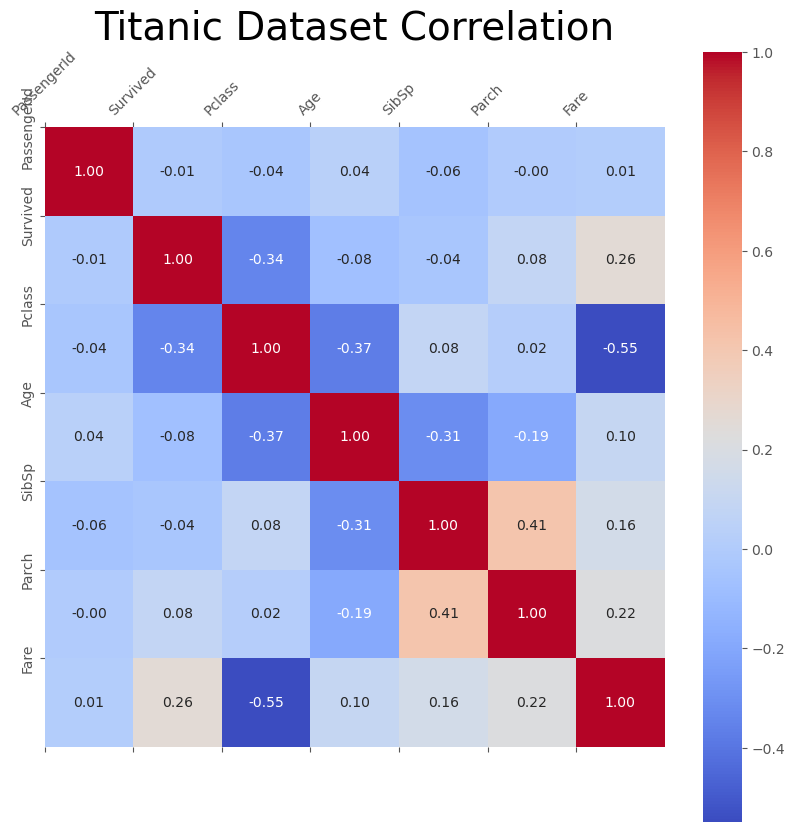

In [44]:
# For multivariate data analysis I've used pandas "correlation matrix" . You can also use seaborn "heatmap".
def plotting_corr(train, size=10):
    # Select only numeric columns
    train_numeric = train.select_dtypes(include=['number'])
    
    # Calculate the correlation matrix
    corr = train_numeric.corr()
    
    # Create the correlation matrix plot
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr, cmap='coolwarm')
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar=True)
    plt.title('Titanic Dataset Correlation', fontsize=28)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
    plt.yticks(range(len(corr.columns)), corr.columns)
    
   
    plt.show()

# Call the function with your DataFrame
plotting_corr(train, size=10)


In [ ]:
sns.heatmap(train.corr(), annot=True)

In [ ]:
plot_correlation_heatmap(train)